# Table of Contents

[01. Import Library](#01)<br>

[02. Load Data](#02)<br>

[03. Exploratory Data Analysis (EDA)](#03)<br>

&nbsp;&nbsp;&nbsp;[3.1. Dependent Variable](#3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1. Use matplotlib](#3.1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2. Use plotly_express](#3.1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3. Use seaborn](#3.1.3)<br>

&nbsp;&nbsp;&nbsp;[3.2. Independent Variables](#3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1. Outliers](#3.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2. Quantitative - Qualitative Features](#3.2.2)<br>

[04. Prediction](#04)<br>

&nbsp;&nbsp;&nbsp;[4.1. Baseline Model](#4.1)<br>
&nbsp;&nbsp;&nbsp;[4.2. Feature Engineering](#4.2)<br>
&nbsp;&nbsp;&nbsp;[4.3. Feature Scaling](#4.3)<br>


[05. Results](#05)<br>



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/working/__notebook__.ipynb


# 01. Import Library<a id='01'></a>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import plotly_express as px

from scipy import stats
from scipy.stats import norm, skew 

import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from lightgbm import LGBMRegressor

# 02. Load Data <a id='02'></a>

In [4]:
print("List of files:", os.listdir('/kaggle/input/house-prices-advanced-regression-techniques'))

# Train data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print("\nTrain data length:",df_train.shape)
print("\nTrain data columns:",df_train.columns)
print("\nTrain data columns:",df_train.info())
print("\nTrain data:\n\n",df_train.head())

List of files: ['sample_submission.csv', 'data_description.txt', 'train.csv', 'test.csv']

Train data length: (1460, 81)

Train data columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces',

In [5]:
# Test data
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print("\nTest data length:",df_test.shape)


Test data length: (1459, 80)


# 03. Exploratory Data Analysis (EDA)<a id='03'></a>

In [6]:
# Correlation
df_train_corr = df_train.corr()
df_train_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [7]:
df_train_corr.style.background_gradient(cmap='coolwarm', axis=None)

In [8]:
# SalePrice has highest corr with OverallQual
df_train_corr[['SalePrice','OverallQual']].style.background_gradient(cmap='coolwarm', axis=None)

,SalePrice,OverallQual
Id,-0.021917,-0.028365
MSSubClass,-0.084284,0.032628
LotFrontage,0.351799,0.251646
LotArea,0.263843,0.105806
OverallQual,0.790982,1.000000
OverallCond,-0.077856,-0.091932
YearBuilt,0.522897,0.572323
YearRemodAdd,0.507101,0.550684
MasVnrArea,0.477493,0.411876
BsmtFinSF1,0.386420,0.239666


In [9]:
# Use panda profile report
# df_train.profile_report()

## 3.1. Dependent Variable<a id='3.1'></a>

In [10]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

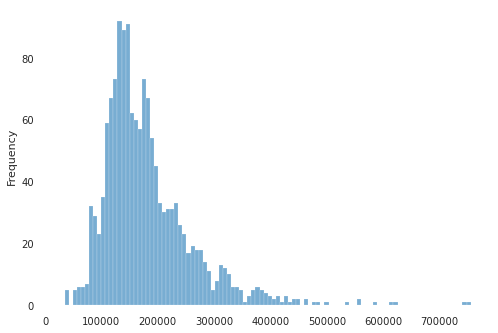

In [11]:
ax=df_train['SalePrice'].plot.hist(bins=100, alpha=0.6)

### 3.1.1. Use matplotlib<a id='3.1.1'></a>

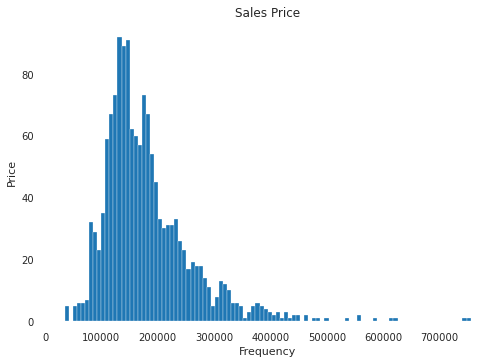

In [12]:
# Use matplotlib

# plt.style.use('ggplot')
plt.hist(df_train['SalePrice'], bins = 100)

# Add title and axis names
plt.title('Sales Price')
plt.xlabel('Frequency')
plt.ylabel('Price') 


plt.show()

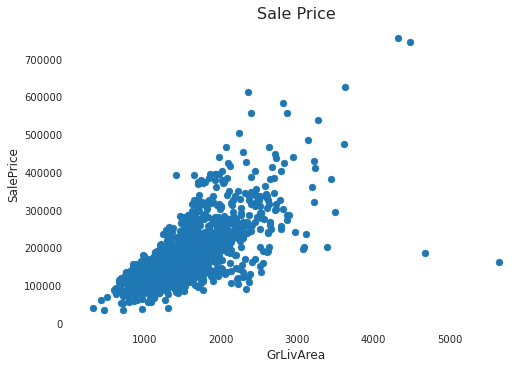

In [13]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=12)
plt.xlabel('GrLivArea', fontsize=12)
plt.title('Sale Price', fontsize=16)
plt.show()

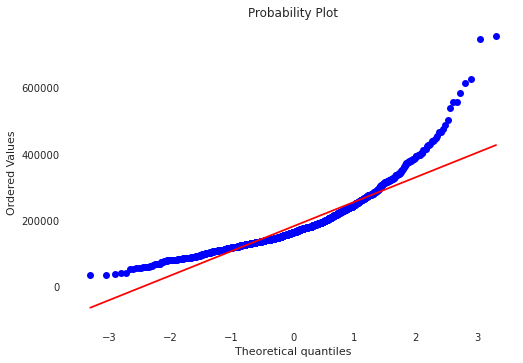

In [14]:
# QQ-plot
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### 3.1.2. Use plotly_express<a id='3.1.2'></a>

In [15]:
# Scatter Plot with color from 2nd variable
px.scatter(df_train, x='GrLivArea', y='SalePrice', color='OverallQual')

In [16]:
# Scatter Plot with color from 2nd variable
px.scatter(df_train, x='TotalBsmtSF', y='SalePrice', color='OverallQual')

In [17]:
# Box Plot
px.box(df_train[['OverallQual', 'SalePrice']].sort_values(by='OverallQual')
       , x='OverallQual'
       , y='SalePrice'
       , color='OverallQual')

In [18]:
# Box Plot
px.box(df_train[['SaleCondition', 'SalePrice']].sort_values(by='SaleCondition')
       , x='SaleCondition'
       , y='SalePrice'
       , color='SaleCondition')

In [19]:
# Box Plot
px.box(df_train[['ExterQual', 'SalePrice']].sort_values(by='ExterQual')
       , x='ExterQual'
       , y='SalePrice'
       , color='ExterQual')

### 3.1.3. Use seaborn<a id='3.1.3'></a>


 mu = 180921.20 and sigma = 79415.29



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 1.0, 'SalePrice distribution')

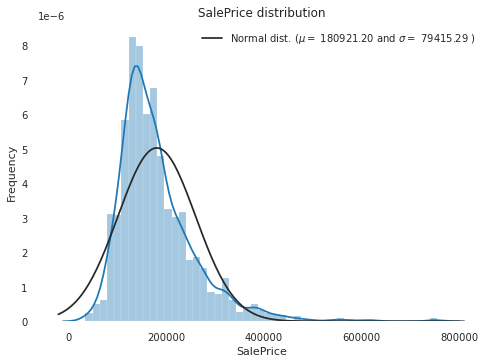

In [20]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='upper right')

ax = plt.axes()
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


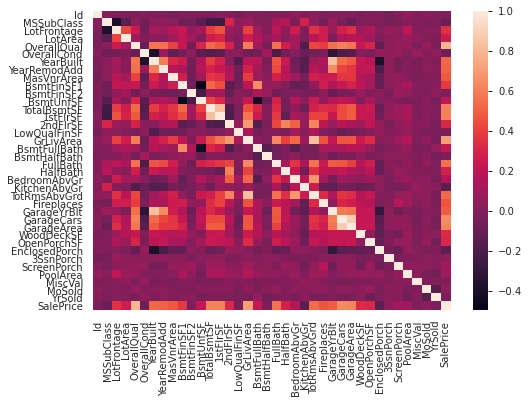

In [21]:
sns.heatmap(df_train_corr, 
            xticklabels=df_train_corr.columns.values,
            yticklabels=df_train_corr.columns.values)

## 3.2. Independent Variables<a id='3.2'></a>

In [22]:
df_train.drop(['SalePrice'], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 3.2.1. Outliers<a id='3.2.1'></a>

In [23]:
# Clean outliers
print("Length of data before dropping outliers:", len(df_train))
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) 
                                & (df_train['SalePrice']<300000)].index)
print("Length of data after dropping outliers:", len(df_train))
df_train = df_train.drop(df_train[(df_train['GrLivArea']>5000) 
                                | (df_train['SalePrice']>500000)].index)
print("Length of data after dropping outliers:", len(df_train))

Length of data before dropping outliers: 1460
Length of data after dropping outliers: 1458
Length of data after dropping outliers: 1449


### 3.2.2. Quantitative - Qualitative Features<a id='3.2.2'></a>

In [24]:
# Quantitative Variables
quan_var = [q for q in df_train.columns if df_train.dtypes[q] != 'object']
quan_var.remove('SalePrice') 
quan_var.remove('Id')
print("Quantitative Variables:\n", quan_var)

# Qualitative Variables
qual_var = [q for q in df_train.columns if df_train.dtypes[q] == 'object']
print("\nQualitative Variables:\n", qual_var)

Quantitative Variables:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

Qualitative Variables:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Gar

all_data size is : (2908, 79)
Missing data percentage:
               Missing Ratio
PoolQC            99.724897
MiscFeature       96.389271
Alley             93.191197
Fence             80.398900
FireplaceQu       48.830812
LotFrontage       16.712517
GarageFinish       5.467675
GarageYrBlt        5.467675
GarageQual         5.467675
GarageCond         5.467675
GarageType         5.398900
BsmtExposure       2.819807
BsmtCond           2.819807
BsmtQual           2.785420
BsmtFinType2       2.751032
BsmtFinType1       2.716644
MasVnrType         0.825309
MasVnrArea         0.790922
MSZoning           0.137552
BsmtFullBath       0.068776
BsmtHalfBath       0.068776
Utilities          0.068776
Functional         0.068776
Exterior2nd        0.034388
Exterior1st        0.034388
SaleType           0.034388
BsmtFinSF1         0.034388
BsmtFinSF2         0.034388
BsmtUnfSF          0.034388
Electrical         0.034388
KitchenQual        0.034388
GarageCars         0.034388
GarageArea         0

Text(0.5, 1.0, 'Percent missing data by feature')

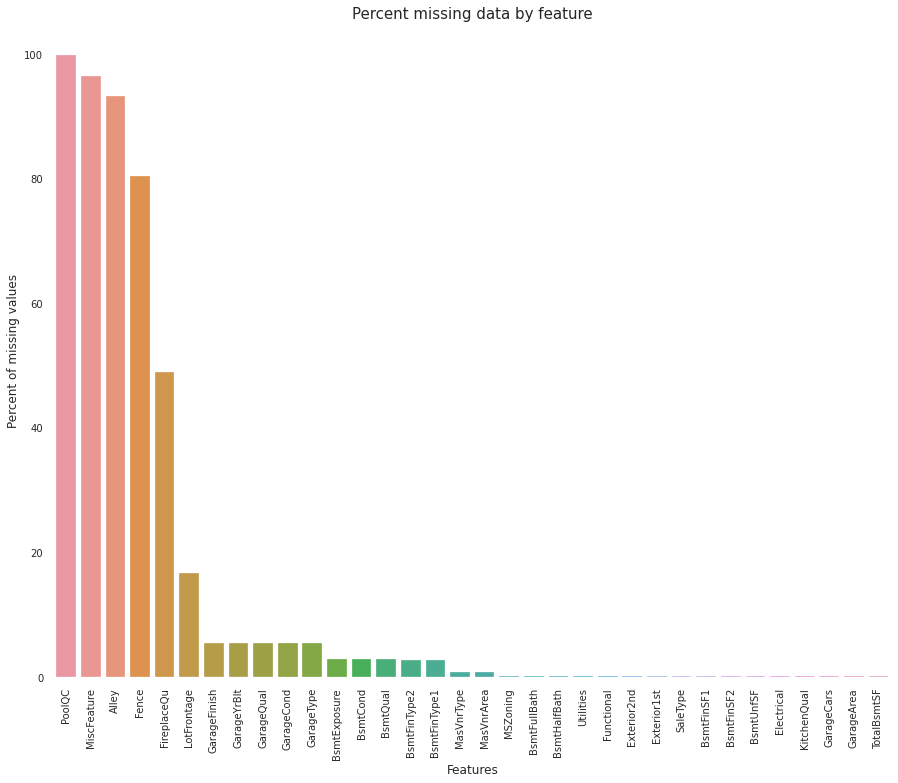

In [25]:
# Combine all data
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
df_all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
df_all_data.drop(['Id','SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(df_all_data.shape))

# Calculate missing data ratio
df_all_data_na = (df_all_data.isnull().sum() / len(df_all_data)) * 100
df_all_data_na = df_all_data_na.drop(df_all_data_na[df_all_data_na == 0].index).sort_values(ascending=False)[:50]
missing_data = pd.DataFrame({'Missing Ratio' :df_all_data_na})
print('Missing data percentage:\n',missing_data.head(50))

# Plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
ax.set_facecolor("white")
sns.barplot(x=df_all_data_na.index, y=df_all_data_na)
sns.color_palette('pastel')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=12)
plt.title('Percent missing data by feature', fontsize=15)

In [26]:
df_all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2904,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2905,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2906,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# 04. Prediction <a id='04'></a>

In [27]:
df_result = pd.DataFrame(columns=['Model','RMSE','MSE','Summary'])
print(df_result)

Empty DataFrame
Columns: [Model, RMSE, MSE, Summary]
Index: []


## 4.1. Baseline Model <a id='4.1'></a>

### Linear Regression

In [28]:
# Run Linear Regression on a single variable that has the highest corr with dependent variable
X = df_train[['OverallQual']]
y = df_train['SalePrice']

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['Linear Regression'
                                            , rmse
                                            , mse
                                            ,'Baseline model'                               
                                           ]], columns=df_result.columns))
print(df_result)

Root Mean Squared Error: 40043.00
               Model         RMSE           MSE         Summary
0  Linear Regression  40043.00124  1.603442e+09  Baseline model


### Random Forest

In [29]:
# RandomForestRegressor
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Baseline model'                               
                                           ]], columns=df_result.columns))
print(df_result)

Root Mean Squared Error: 38390.09
                   Model          RMSE           MSE         Summary
0      Linear Regression  40043.001240  1.603442e+09  Baseline model
0  RandomForestRegressor  38390.092114  1.473799e+09  Baseline model


### Features - Missing Ratio

In [30]:
# Get the list of variable based on missing data ratio
features_for_reg = missing_data[missing_data['Missing Ratio']<70].index.values.tolist()


# Get Dummies
X_all = pd.get_dummies(df_all_data[features_for_reg])
X_all.fillna(0, inplace=True)

X = X_all[0:len(df_train)]
y = df_train['SalePrice']

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(random_state=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Features with less than 70% missing data'                               
                                           ]], columns=df_result.columns))



# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

print("Most important:\n", names[:10])
print("Least important:\n", names[(-10):])


Root Mean Squared Error: 35567.54
Most important:
 ['GarageCars', 'TotalBsmtSF', 'GarageArea', 'KitchenQual_TA', 'GarageYrBlt', 'BsmtFinSF1', 'MasVnrArea', 'KitchenQual_Gd', 'BsmtQual_Ex', 'BsmtUnfSF']
Least important:
 ['Exterior2nd_CBlock', 'Functional_Sev', 'Exterior2nd_Other', 'Utilities_NoSeWa', 'SaleType_Oth', 'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'GarageCond_Ex', 'GarageQual_Ex', 'Utilities_AllPub']


### Features - Importance

In [31]:
# Get the list of variable based on rf feature importance
n_features = 45
features_for_reg = names[:n_features]


# Run Linear Regression
X_all = X_all[features_for_reg]
X_all.fillna(0, inplace=True)

X = X_all[0:len(df_train)]
y = df_train['SalePrice']

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(random_state=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Important features based on RF'                               
                                           ]], columns=df_result.columns))



# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

print("Most important:\n", names[:10])
print("Least important:\n", names[(-10):])

Root Mean Squared Error: 35547.16
Most important:
 ['GarageCars', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt', 'KitchenQual_TA', 'BsmtFinSF1', 'MasVnrArea', 'KitchenQual_Gd', 'BsmtUnfSF', 'BsmtQual_Ex']
Least important:
 ['BsmtExposure_Gd', 'Exterior1st_VinylSd', 'Electrical_SBrkr', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'BsmtExposure_Av', 'GarageType_Basment', 'BsmtCond_Gd', 'Exterior2nd_VinylSd', 'SaleType_New']


## 4.2. Feature Engineering <a id='4.2'></a>

In [32]:
# New feature
df_all_data["OverallQual_Garage_GrLivArea"] = df_all_data["OverallQual"] * df_all_data["GarageArea"] * df_all_data["GrLivArea"]

# Get Dummies
X_all = pd.get_dummies(df_all_data)
X_all.fillna(0, inplace=True)

X = X_all[0:len(df_train)]
y = df_train['SalePrice']

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(random_state=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Features engineering'                               
                                           ]], columns=df_result.columns))



# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

print("Most important:\n", names[:10])
print("Least important:\n", names[(-10):])


Root Mean Squared Error: 26039.61
Most important:
 ['OverallQual_Garage_GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual', 'GrLivArea', '1stFlrSF', 'LotArea', 'YearRemodAdd', 'YearBuilt', 'GarageArea']
Least important:
 ['RoofMatl_Roll', 'SaleCondition_AdjLand', 'Utilities_NoSeWa', 'MiscFeature_TenC', 'RoofMatl_Membran', 'Exterior1st_CBlock', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn']


### Feature Engineering and Missing Value

In [33]:
# Get the list of variable based on missing data ratio
features_to_drop = missing_data[missing_data['Missing Ratio']>=70].index.values.tolist()


# Get Dummies
X_all = pd.get_dummies(df_all_data[df_all_data.columns.difference(features_to_drop)])
X_all.fillna(0, inplace=True)

X = X_all[0:len(df_train)]
y = df_train['SalePrice']

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestRegressor(random_state=3)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Features Engineering & < 70% missing data'                               
                                           ]], columns=df_result.columns))



# Calculate feature importances
importances = rf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

print("Most important:\n", names[:10])
print("Least important:\n", names[(-10):])



Root Mean Squared Error: 26033.32
Most important:
 ['OverallQual_Garage_GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual', 'GrLivArea', '1stFlrSF', 'LotArea', 'YearRemodAdd', 'YearBuilt', 'GarageArea']
Least important:
 ['Heating_Wall', 'Exterior2nd_CBlock', 'Utilities_AllPub', 'RoofMatl_Roll', 'Condition2_RRAe', 'RoofMatl_Membran', 'Condition2_RRAn', 'Condition2_RRNn', 'HeatingQC_Po', 'Exterior1st_AsphShn']


### Light GBM

In [34]:
lgb_model = LGBMRegressor().fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['LGBMRegressor'
                                            , rmse
                                            , mse
                                            ,'Features Engineering & < 70% missing data'                               
                                           ]], columns=df_result.columns))

Root Mean Squared Error: 22584.01


### Light GBM best params

In [35]:
# Grid search (narrow down to this grid after several iterations)
lgb_params = {"learning_rate": [0.005, 0.01],
               "n_estimators": [5000],
               "max_depth": [4, 5],
               "feature_fraction": [0.1, 0.2, 0.3],
               "colsample_bytree": [0.8],
               'num_leaves': [4, 5]}
                              
lgb_cv_model = GridSearchCV(lgb_model,
                             lgb_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

print(lgb_cv_model.best_params_)

# use best params
lgb_tuned = LGBMRegressor(**lgb_cv_model.best_params_).fit(X_train, y_train)
y_pred_lgb = lgb_tuned.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print("Root Mean Squared Error: {:.2f}".format(rmse))

df_result = df_result.append(pd.DataFrame([['LGBMRegressor'
                                            , rmse
                                            , mse
                                            ,'Tuned model with Features Engineering & < 70% missing data'                               
                                           ]], columns=df_result.columns))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.7min finished


{'colsample_bytree': 0.8, 'feature_fraction': 0.1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 5000, 'num_leaves': 4}
Root Mean Squared Error: 21324.30


## 4.3. Feature Scaling <a id='4.3'></a>

In [36]:
df_all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2908.0,5.716816e+01,4.258101e+01,20.0,20.00,50.0,70.00,190.0
LotFrontage,2422.0,6.907060e+01,2.268598e+01,21.0,59.00,68.0,80.00,313.0
LotArea,2908.0,1.010131e+04,7.756413e+03,1300.0,7449.75,9432.0,11503.00,215245.0
OverallQual,2908.0,6.076341e+00,1.396720e+00,1.0,5.00,6.0,7.00,10.0
OverallCond,2908.0,5.566369e+00,1.114712e+00,1.0,5.00,5.0,6.00,9.0
YearBuilt,2908.0,1.971190e+03,3.028092e+01,1872.0,1953.00,1973.0,2000.25,2010.0
YearRemodAdd,2908.0,1.984188e+03,2.089430e+01,1950.0,1965.00,1993.0,2004.00,2010.0
MasVnrArea,2885.0,1.001477e+02,1.748522e+02,0.0,0.00,0.0,163.00,1600.0
BsmtFinSF1,2907.0,4.360908e+02,4.398690e+02,0.0,0.00,368.0,732.00,4010.0
BsmtFinSF2,2907.0,4.958445e+01,1.692573e+02,0.0,0.00,0.0,0.00,1526.0


In [37]:
df_all_data_scaled =  pd.DataFrame()

scaler = StandardScaler()

for col in quan_var:    
    scaler.fit((np.array(df_all_data[col])).reshape(-1, 1))
    scaled_list = scaler.transform((np.array(df_all_data[col])).reshape(-1, 1))
    
    # Convert list of list to flat list before putting back to the df
    df_all_data_scaled[col] = [item for elem in scaled_list for item in elem]
    
df_all_data_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
MSSubClass,2908.0,8.481772e-17,1.000172,-0.873031,-0.873031,-0.168371,0.301403,3.120046
LotFrontage,2422.0,-3.105599e-17,1.000207,-2.119394,-0.444005,-0.047202,0.481868,10.754648
LotArea,2908.0,2.771501e-17,1.000172,-1.134909,-0.341912,-0.086306,0.180745,26.452818
OverallQual,2908.0,-2.782811e-16,1.000172,-3.635098,-0.770753,-0.054667,0.661419,2.809678
OverallCond,2908.0,3.255076e-16,1.000172,-4.097159,-0.508172,-0.508172,0.389074,3.080814
YearBuilt,2908.0,2.269925e-15,1.000172,-3.276229,-0.600817,0.059778,0.959840,1.281880
YearRemodAdd,2908.0,-5.123843e-15,1.000172,-1.636538,-0.918516,0.421793,0.948343,1.235552
MasVnrArea,2885.0,1.839949e-16,1.000173,-0.572855,-0.572855,-0.572855,0.359522,8.579314
BsmtFinSF1,2907.0,1.044916e-16,1.000172,-0.991581,-0.991581,-0.154825,0.672837,8.126338
BsmtFinSF2,2907.0,-1.549042e-16,1.000172,-0.293004,-0.293004,-0.293004,-0.293004,8.724408


In [38]:
# New feature
df_all_data_scaled["OverallQual_Garage_GrLivArea"] = df_all_data_scaled["OverallQual"] * \
                                                     df_all_data_scaled["GarageArea"] * \
                                                     df_all_data_scaled["GrLivArea"]

# Get Dummies
X_all = pd.get_dummies(df_all_data_scaled)
X_all.fillna(0, inplace=True)

X = X_all[0:len(df_train)]
y = df_train['SalePrice']

# Initiate train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_scaled = RandomForestRegressor(random_state=3)
rf_scaled.fit(X_train,y_train)
y_pred_rf = rf_scaled.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['RandomForestRegressor'
                                            , rmse
                                            , mse
                                            ,'Features engineering & Scaled'                               
                                           ]], columns=df_result.columns))



# Calculate feature importances
importances = rf_scaled.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

print("Most important:\n", names[:10])
print("Least important:\n", names[(-10):])


Root Mean Squared Error: 25616.74
Most important:
 ['OverallQual', 'OverallQual_Garage_GrLivArea', 'GrLivArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'LotArea', 'GarageArea', 'YearRemodAdd']
Least important:
 ['KitchenAbvGr', 'EnclosedPorch', 'BsmtFinSF2', '3SsnPorch', 'HalfBath', 'ScreenPorch', 'MiscVal', 'LowQualFinSF', 'BsmtHalfBath', 'PoolArea']


In [39]:
# Get the list of variable based on missing data ratio
features_to_drop = missing_data[missing_data['Missing Ratio']>=70].index.values.tolist()


# Get Dummies
X_all = pd.get_dummies(df_all_data_scaled[df_all_data_scaled.columns.difference(features_to_drop)])
X_all.fillna(0, inplace=True)

lgb_scaled = LGBMRegressor().fit(X_train, y_train)
y_pred_lgb = lgb_scaled.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
print("Root Mean Squared Error: {:.2f}".format(rmse))
df_result = df_result.append(pd.DataFrame([['LGBMRegressor'
                                            , rmse
                                            , mse
                                            ,'Features Engineering & Scaled & < 70% missing data'                               
                                           ]], columns=df_result.columns))

Root Mean Squared Error: 24340.52


In [40]:
# Grid search (narrow down to this grid after several iterations)
lgb_params = {"learning_rate": [0.005, 0.01],
               "n_estimators": [5000],
               "max_depth": [4, 5],
               "feature_fraction": [0.1, 0.2, 0.3],
               "colsample_bytree": [0.8],
               'num_leaves': [4, 5]}
                              
lgb_cv_model = GridSearchCV(lgb_scaled,
                             lgb_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

print(lgb_cv_model.best_params_)

# use best params
lgb_scaled_tuned = LGBMRegressor(**lgb_cv_model.best_params_).fit(X_train, y_train)
y_pred_lgb_scaled_tuned = lgb_scaled_tuned.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lgb_scaled_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb_scaled_tuned))
print("Root Mean Squared Error: {:.2f}".format(rmse))

df_result = df_result.append(pd.DataFrame([['LGBMRegressor'
                                            , rmse
                                            , mse
                                            ,'Tuned model with Features Engineering & Scaled & < 70% missing data'                               
                                           ]], columns=df_result.columns))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.0min finished


{'colsample_bytree': 0.8, 'feature_fraction': 0.1, 'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 5000, 'num_leaves': 5}
Root Mean Squared Error: 23028.29


# 05. Results<a id='05'></a>

In [41]:
df_result['RMSE'] = df_result['RMSE'].astype(int)
df_result['MSE'] = df_result['MSE'].astype(int)
df_result

,Model,RMSE,MSE,Summary
0,Linear Regression,40043,1603441948,Baseline model
0,RandomForestRegressor,38390,1473799172,Baseline model
0,RandomForestRegressor,35567,1265049550,Features with less than 70% missing data
0,RandomForestRegressor,35547,1263600473,Important features based on RF
0,RandomForestRegressor,26039,678061064,Features engineering
0,RandomForestRegressor,26033,677733877,Features Engineering & < 70% missing data
0,LGBMRegressor,22584,510037370,Features Engineering & < 70% missing data
0,LGBMRegressor,21324,454725642,Tuned model with Features Engineering & < 70% ...
0,RandomForestRegressor,25616,656217535,Features engineering & Scaled
0,LGBMRegressor,24340,592460936,Features Engineering & Scaled & < 70% missing ...


### Prediction Submission

In [42]:
# # Predict using rf
# X_test = X_all.iloc[len(df_train):len(X_all)]
# y_pred_rf = rf.predict(X_test)

# # Predict using lgb
# X_test = X_all.iloc[len(df_train):len(X_all)]
# y_pred_lgb = lgb_model.predict(X_test)

# # Predict using lgb_tuned
# X_test = X_all.iloc[len(df_train):len(X_all)]
# y_pred_lgb_tuned = lgb_tuned.predict(X_test)

# Predict using rf_scaled
X_test = X_all.iloc[len(df_train):len(X_all)]
y_pred_rf_scaled = rf_scaled.predict(X_test)

# Predict using lgb_scaled
X_test = X_all.iloc[len(df_train):len(X_all)]
y_pred_lgb_tuned = lgb_scaled_tuned.predict(X_test)

In [43]:
# Submission
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = y_pred_lgb_tuned
sub.to_csv('submission.csv',index=False)